No missing values in the dataset.

Summary statistics:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
count     150.000000    150.000000     150.000000    150.000000  150.000000
mean        5.843333      3.054000       3.758667      1.198667    1.000000
std         0.828066      0.433594       1.764420      0.763161    0.819232
min         4.300000      2.000000       1.000000      0.100000    0.000000
25%         5.100000      2.800000       1.600000      0.300000    0.000000
50%         5.800000      3.000000       4.350000      1.300000    1.000000
75%         6.400000      3.300000       5.100000      1.800000    2.000000
max         7.900000      4.400000       6.900000      2.500000    2.000000


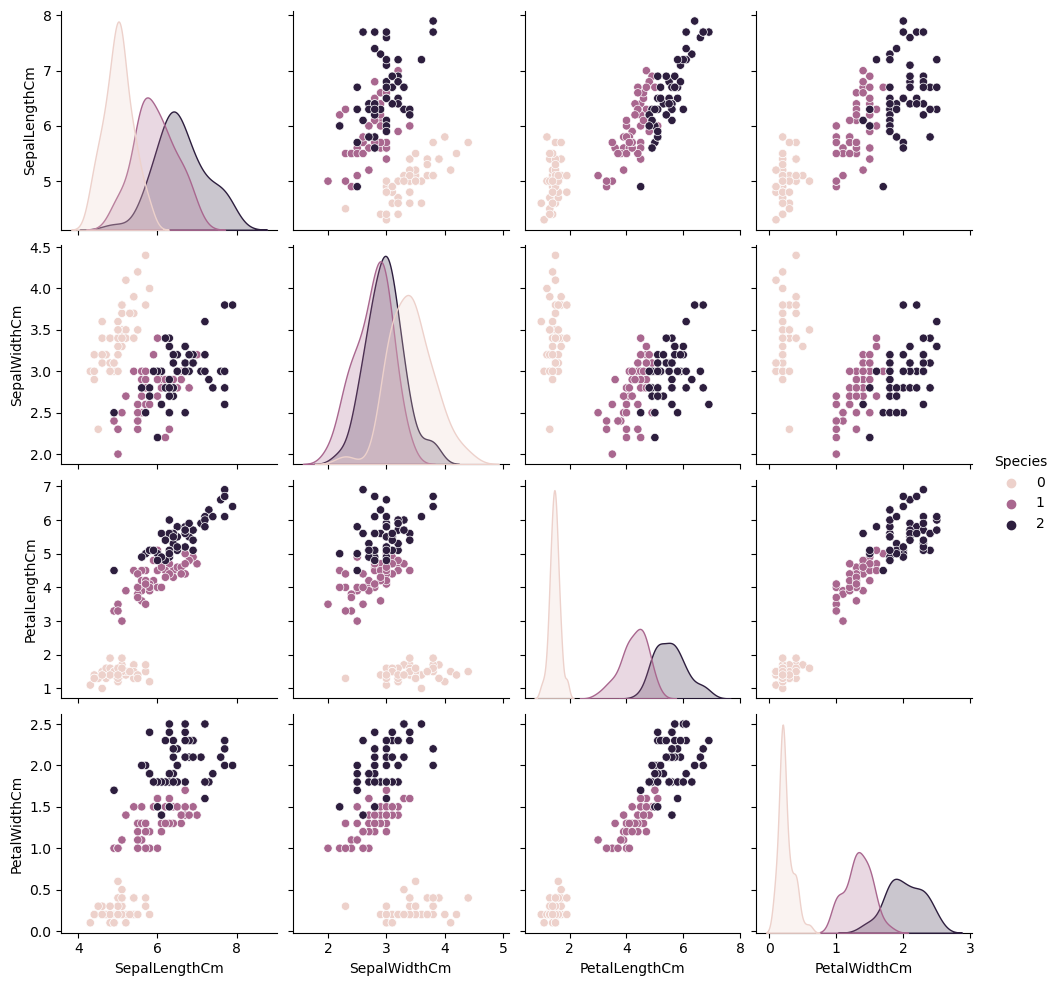

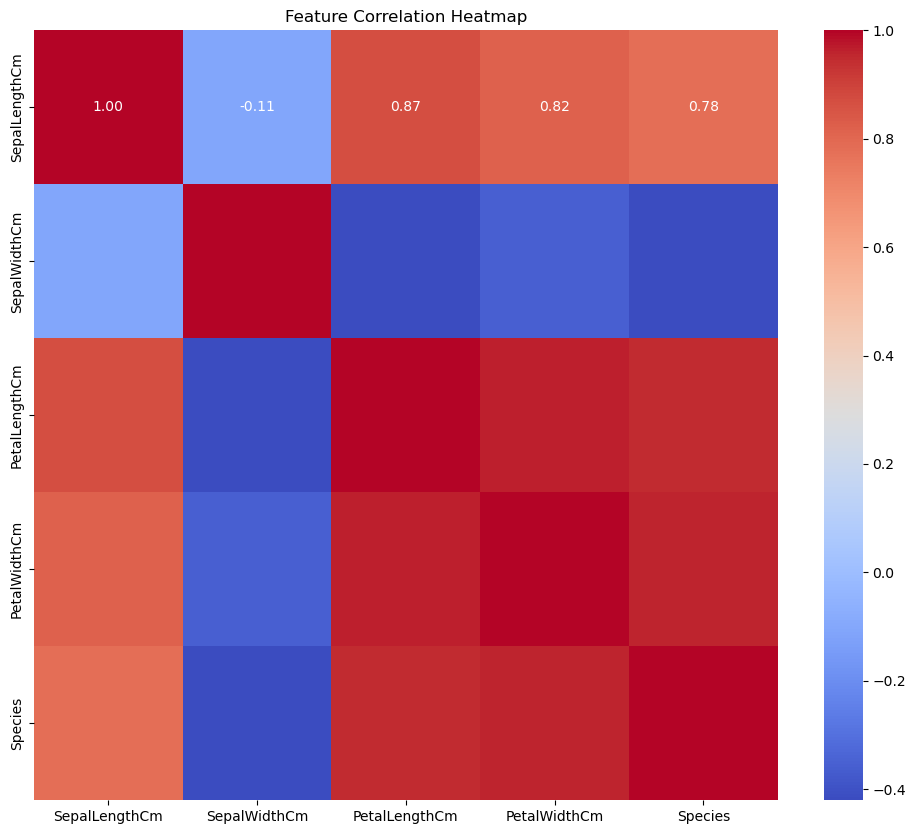

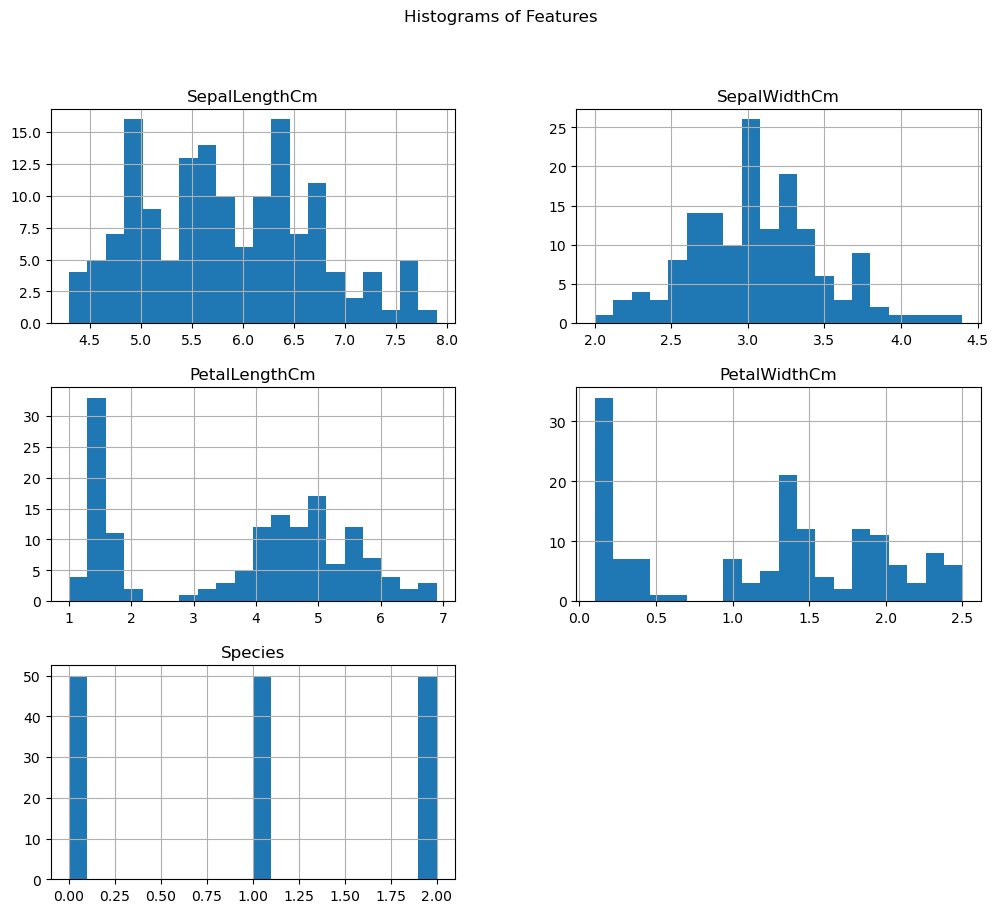

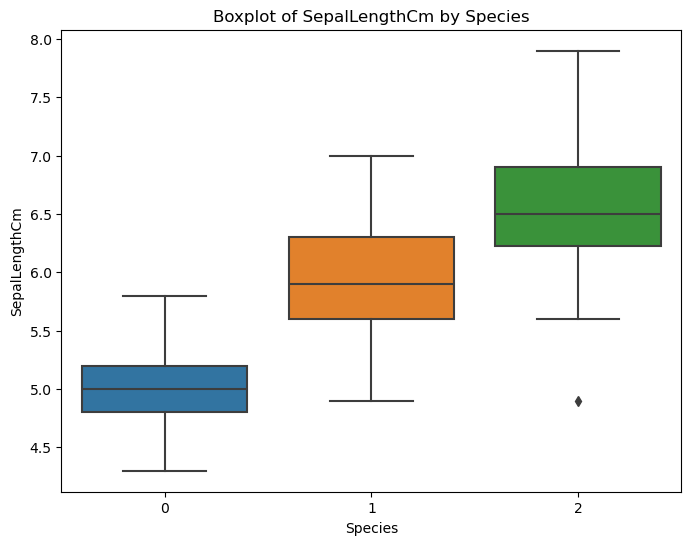

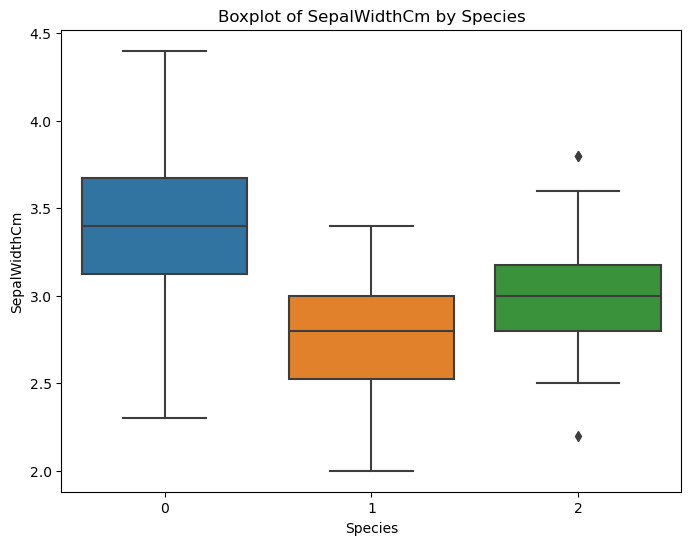

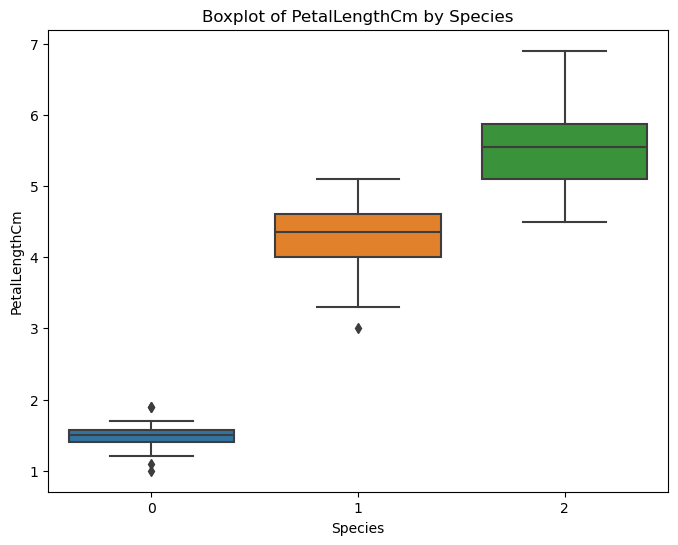

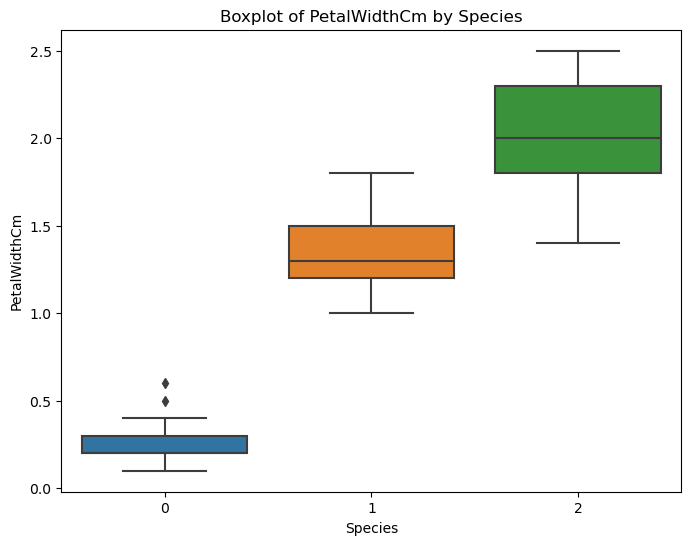


Accuracy of the model: 1.0

Confusion Matrix:
 [[70  0  0]
 [ 0 80  0]
 [ 0  0 80]]


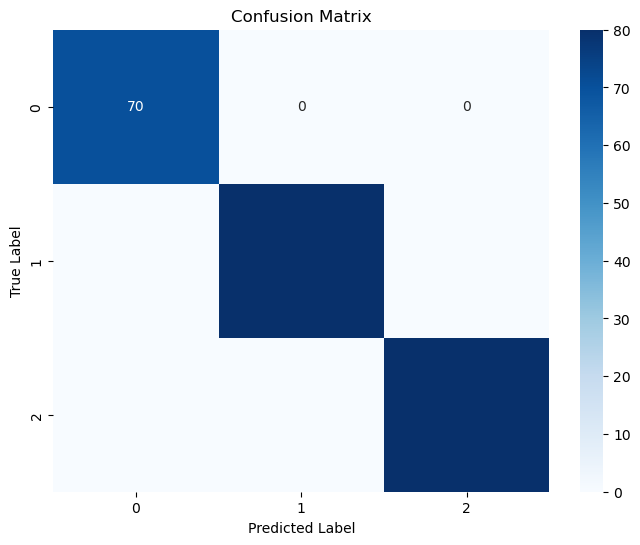


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        70
Iris-versicolor       1.00      1.00      1.00        80
 Iris-virginica       1.00      1.00      1.00        80

       accuracy                           1.00       230
      macro avg       1.00      1.00      1.00       230
   weighted avg       1.00      1.00      1.00       230


The predicted species for the input [5.1 3.5 1.4 0.2] is: Iris-setosa


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the data
file_path = 'Iris.csv'  # Path to the uploaded file
iris_data = pd.read_csv(file_path)

# Step 2: Data preprocessing
# Drop the 'Id' column if it exists
if 'Id' in iris_data.columns:
    iris_data.drop(columns=['Id'], inplace=True)

# Check for missing values
if iris_data.isnull().sum().sum() > 0:
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")

# Encode the target variable 'Species'
label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

# Step 3: Exploratory Data Analysis (EDA)
# Display summary statistics
print("\nSummary statistics:\n", iris_data.describe())

# Plot the pairplot to visualize relationships between features
sns.pairplot(iris_data, hue='Species')
plt.show()

# Display the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Additional EDA: Histograms for each feature
iris_data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Features')
plt.show()

# Additional EDA: Boxplots for each feature
for column in iris_data.columns[:-1]:  # Exclude 'Species'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=iris_data['Species'], y=iris_data[column])
    plt.title(f'Boxplot of {column} by Species')
    plt.show()

# Step 4: Feature selection and target variable
X = iris_data.drop(columns=['Species'])  # Features
y = iris_data['Species']  # Target

# Add more random samples to the dataset to simulate larger data
additional_data = X.sample(n=1000, replace=True, random_state=42)  # Create more samples
additional_target = y.sample(n=1000, replace=True, random_state=42)  # Duplicate targets accordingly
X = pd.concat([X, additional_data], ignore_index=True)
y = pd.concat([y, additional_target], ignore_index=True)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
# We use a RandomForestClassifier (you can change this to other classifiers if needed)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Step 6: Test the model
y_pred = classifier.predict(X_test)

# Step 7: Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the model:", accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:\n", class_report)

# Step 8: Predict on new data (example)
# Use a DataFrame to maintain valid feature names
new_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)  # Example data (SepalLength, SepalWidth, PetalLength, PetalWidth)
predicted_class = classifier.predict(new_data)
predicted_species = label_encoder.inverse_transform(predicted_class)
print("\nThe predicted species for the input", new_data.values[0], "is:", predicted_species[0])
